#### Información:
Nombre: Yessica Fabiola Santiago Valdes

Matrícula: 2173011484

## Bibliotecas y lectura de datos

In [344]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
df = pd.read_csv("train.csv", index_col="id")

## Understanding my variables

In [345]:
df.shape # Devuelve el n ́umero de filas por el n ́umero de columnas del conjunto de datos. 
df.head() # Devuelve las primeras 5 filas del conjunto de datos

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [346]:
df.columns #Devuelve todos los nombres de las columnas 

Index(['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color',
       'type'],
      dtype='object')

In [347]:
df.nunique(axis=0) #Devuelve un número de valores únicos para cada variable

bone_length      371
rotting_flesh    371
hair_length      371
has_soul         371
color              6
type               3
dtype: int64

In [348]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))) 

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


In [349]:
df.color.unique() 

array(['clear', 'green', 'black', 'white', 'blue', 'blood'], dtype=object)

In [350]:
df.type.unique()

array(['Ghoul', 'Goblin', 'Ghost'], dtype=object)

### Reclasificación de la columna de 'color'

In [351]:
# Reclassify condition column
def clean_condition(row):
    
    clear = ['clear','white']

    if row.color in clear:
        return 'clear'    
    return row.color

# Clean dataframe
def clean_df(playlist):
    df_cleaned = df.copy()
    df_cleaned['color'] = df_cleaned.apply(lambda row: clean_condition(row), axis=1)
    return df_cleaned

# Get df with reclassfied 'condition' column
df_cleaned = clean_df(df)
print(df_cleaned.color.unique())

['clear' 'green' 'black' 'blue' 'blood']


#### Eliminar variables -> necesario para realizar el mapa de calor

In [352]:
df_cleaned = df_cleaned.copy().drop(['type','color'], axis=1)

#### Selección de variables -> eliminar valores nulos

In [353]:
NA_val = df_cleaned.isna().sum()
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df_cleaned.shape[0]<threshold:
            col_pass.append(i)
    return col_pass

df_cleaned = df_cleaned[na_filter(NA_val)]
df_cleaned.columns

Index(['bone_length', 'rotting_flesh', 'hair_length', 'has_soul'], dtype='object')

In [354]:
df_cleaned.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


In [355]:
df_cleaned.head()

,bone_length,rotting_flesh,hair_length,has_soul
id,,,,
0,0.354512,0.350839,0.465761,0.781142
1,0.575560,0.425868,0.531401,0.439899
2,0.467875,0.354330,0.811616,0.791225
4,0.776652,0.508723,0.636766,0.884464
5,0.566117,0.875862,0.418594,0.636438


### Estableciendo parámetros para la eliminación de valores atípicos 

In [356]:
df_cleaned = df_cleaned[df_cleaned['rotting_flesh']>0.6]
df_cleaned.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,95.000000,95.000000,95.000000,95.000000
mean,0.406848,0.692135,0.450679,0.412967
std,0.130718,0.074202,0.178651,0.182948
min,0.100945,0.602932,0.134600,0.043321
25%,0.318127,0.635634,0.326336,0.292846
50%,0.396988,0.671331,0.418594,0.414697
75%,0.505763,0.729616,0.578980,0.554052
max,0.672977,0.932466,0.946612,0.803195


In [357]:
df_cleaned.head()

,bone_length,rotting_flesh,hair_length,has_soul
id,,,,
5,0.566117,0.875862,0.418594,0.636438
12,0.314295,0.671280,0.417267,0.227548
19,0.280942,0.701457,0.179633,0.141183
34,0.524080,0.750988,0.524637,0.443358
56,0.492438,0.623197,0.604879,0.376142


### Eliminación de filas con valores nulos

In [358]:
df_cleaned = df_cleaned.dropna(axis=1)

In [359]:
df_cleaned.shape

(95, 4)

## Matriz de correlación - Mapa de calor


<AxesSubplot:>

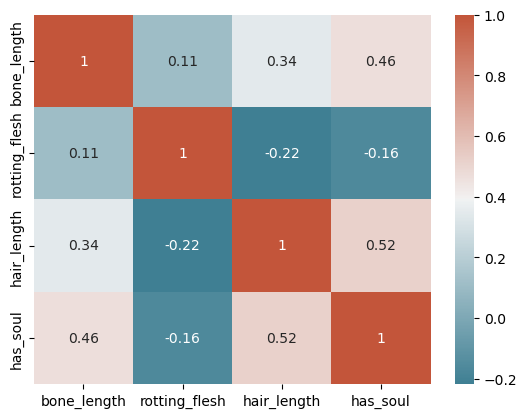

In [360]:
corr = df_cleaned.corr() # plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### Data fields

    id: id de la criatura
    bone_length: longitud promedio de los huesos en la criatura, normalizada entre 0 y 1
    rotting_flesh: porcentaje de carne en descomposición en la criatura
    hair_length: longitud promedio del cabello, normalizada entre 0 y 1
    has_soul: porcentaje de alma en la criatura
    color: color dominante de la criatura: 'blanco', 'negro', 'claro', 'azul', 'verde', 'sangre'
    type: variable objetivo: 'Fantasma', 'Duende' y 'Demonio'

## Diagrama de Dispersión

<AxesSubplot:xlabel='hair_length', ylabel='has_soul'>

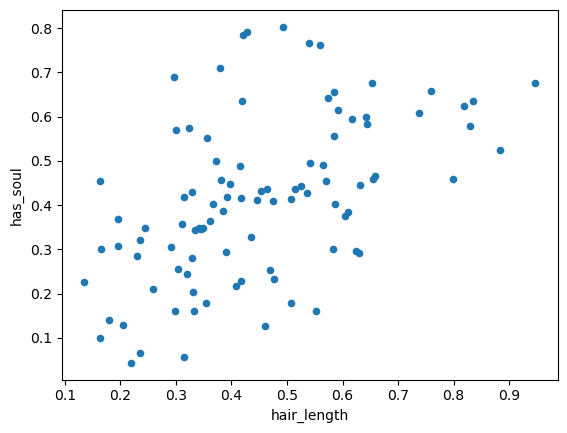

In [361]:
df_cleaned.plot(kind='scatter', x='hair_length', y='has_soul') 

<AxesSubplot:xlabel='hair_length', ylabel='rotting_flesh'>

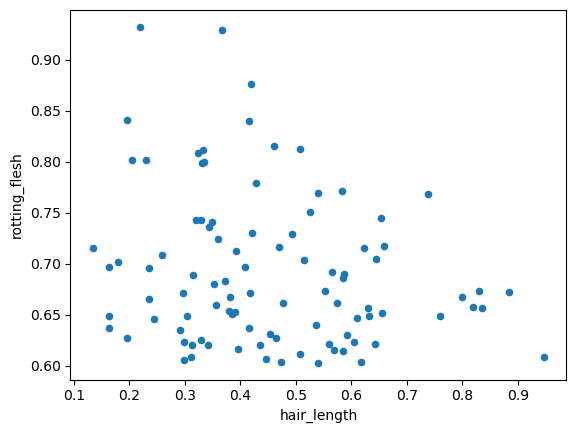

In [362]:
df_cleaned.plot(kind='scatter', x='hair_length', y='rotting_flesh') 

<AxesSubplot:xlabel='bone_length', ylabel='rotting_flesh'>

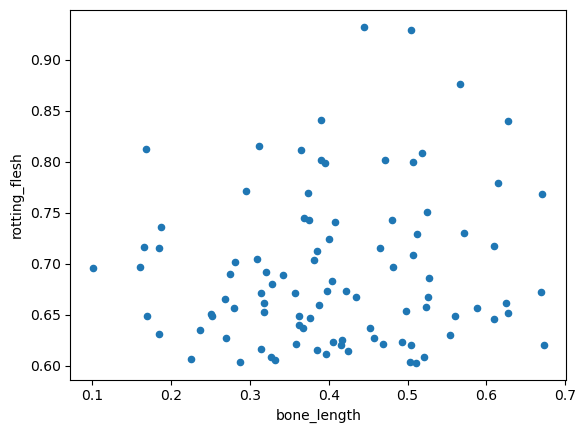

In [363]:

df_cleaned.plot(kind='scatter', x='bone_length', y='rotting_flesh') 

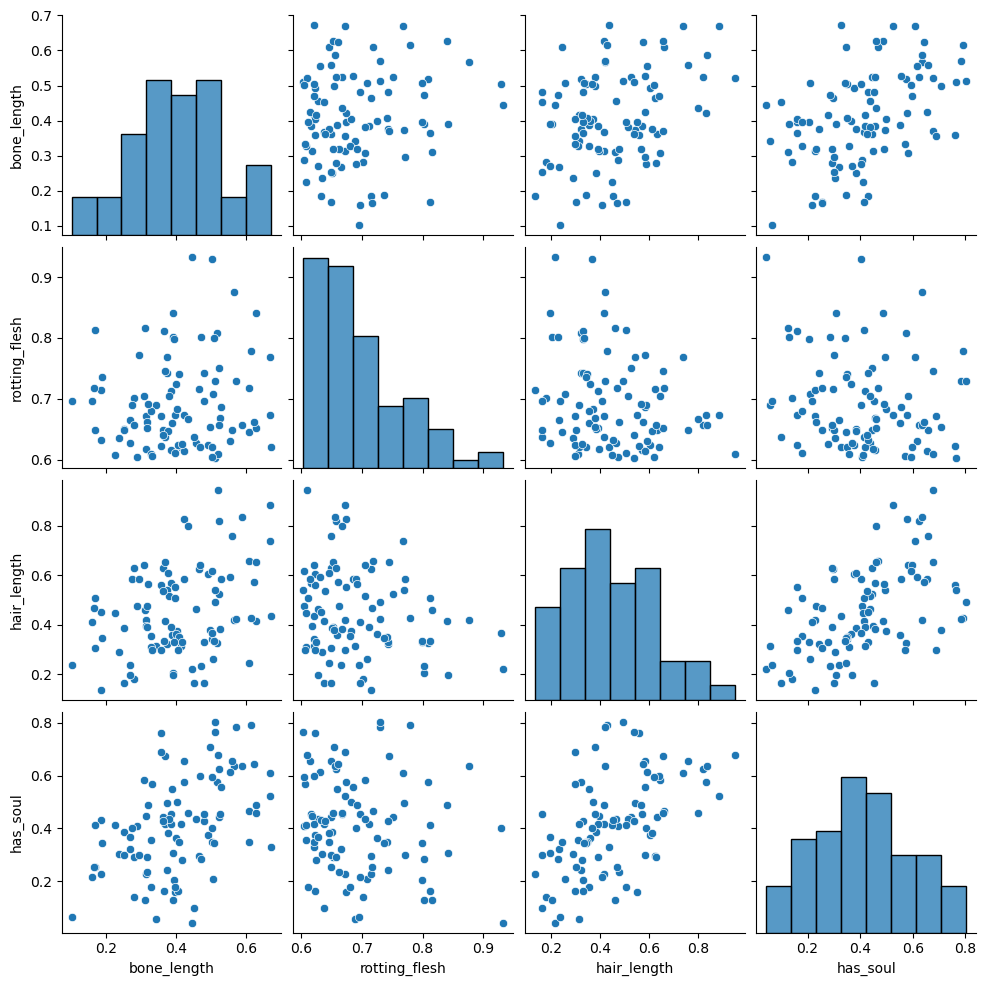

In [364]:
sns.pairplot(df_cleaned)

## Histograma

<AxesSubplot:ylabel='Frequency'>

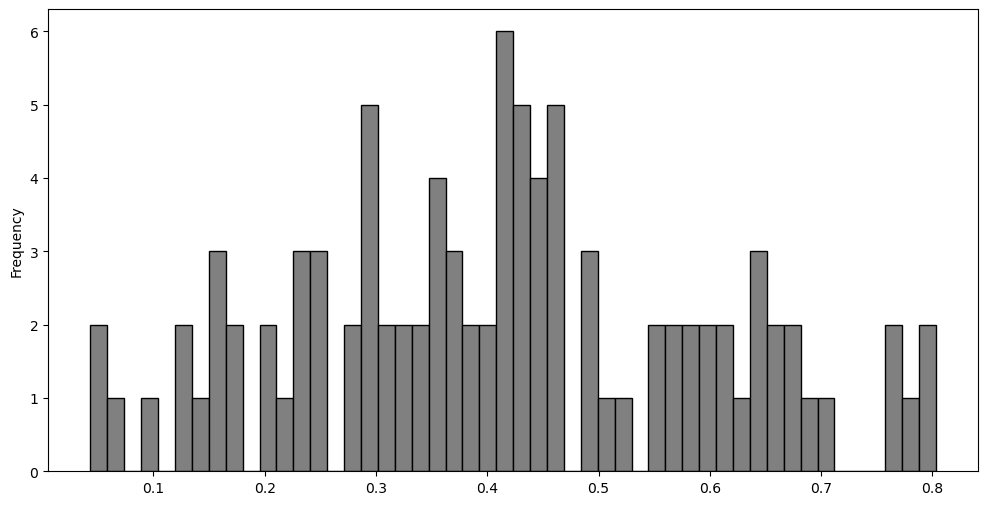

In [365]:
df_cleaned['has_soul'].plot(kind='hist', bins=50, figsize=(12,6),facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

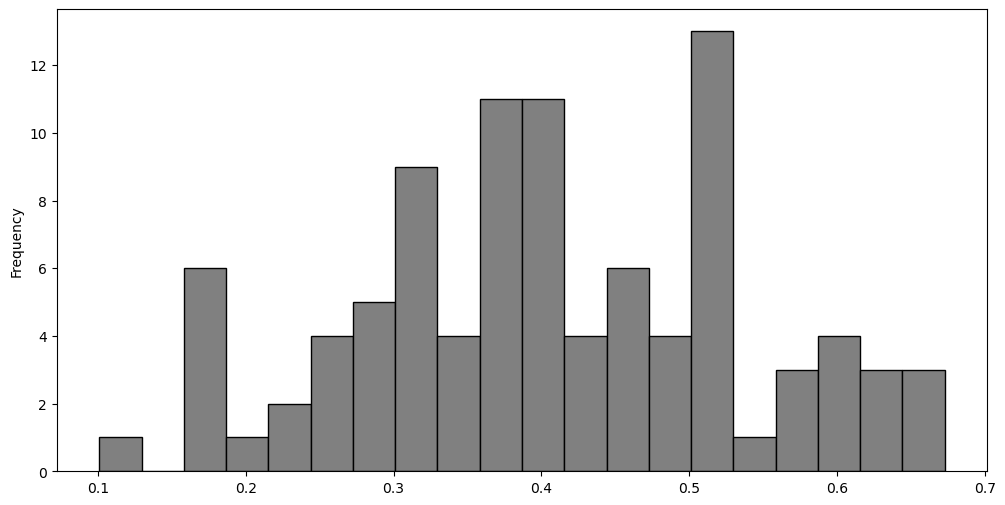

In [366]:
df_cleaned['bone_length'].plot(kind='hist',bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

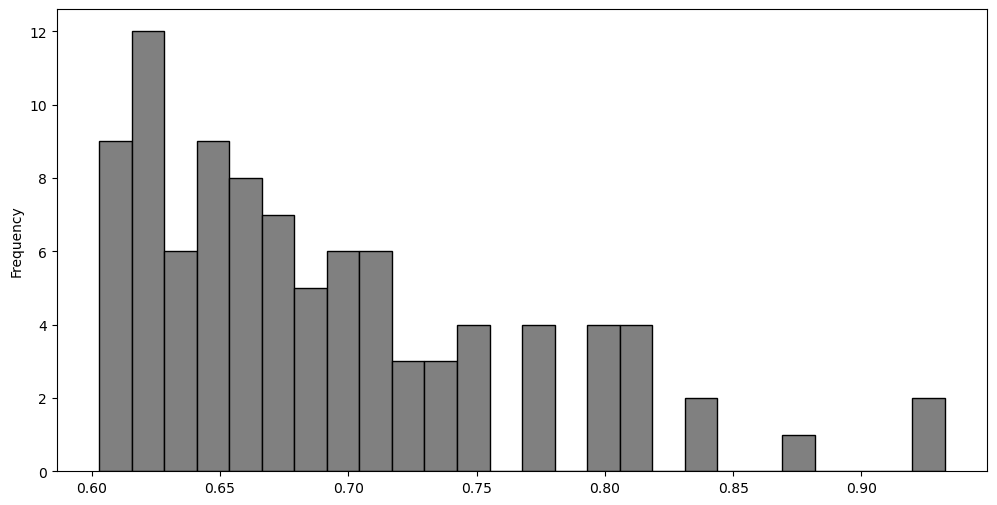

In [367]:
df_cleaned['rotting_flesh'].plot(kind='hist',bins=26, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

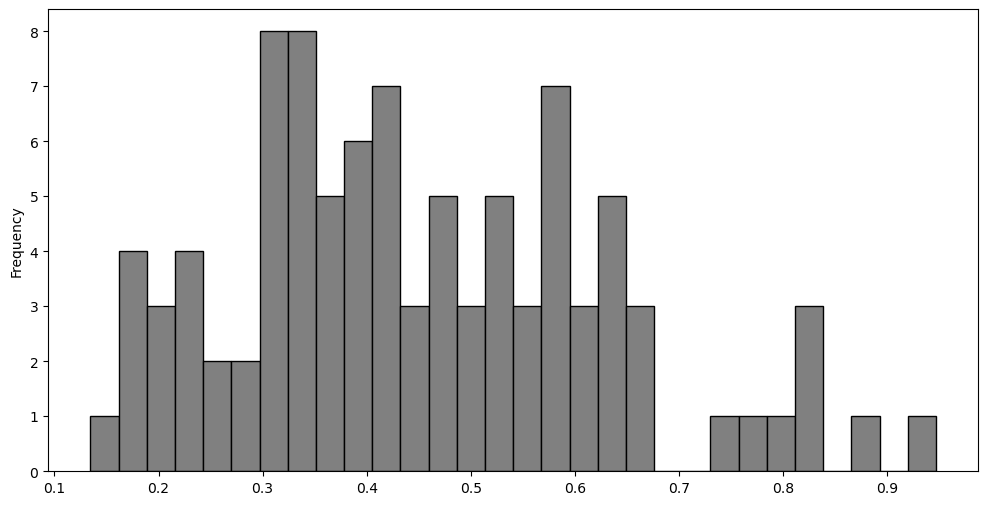

In [368]:
df_cleaned['hair_length'].plot(kind='hist',bins=30, figsize=(12,6), facecolor='grey',edgecolor='black')


## Boxplots

<AxesSubplot:>

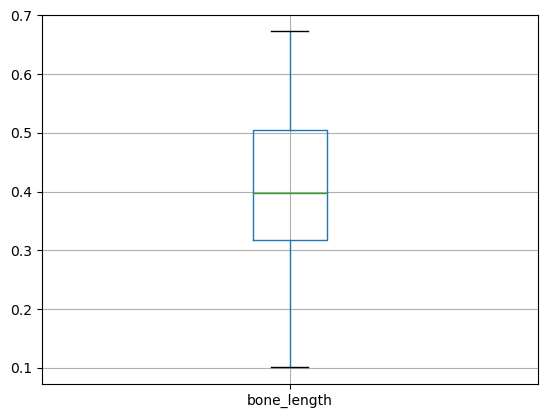

In [369]:
df_cleaned.boxplot('bone_length')

<AxesSubplot:>

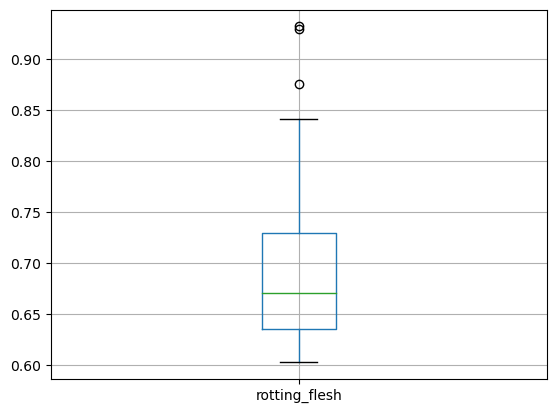

In [370]:
df_cleaned.boxplot('rotting_flesh')

<AxesSubplot:>

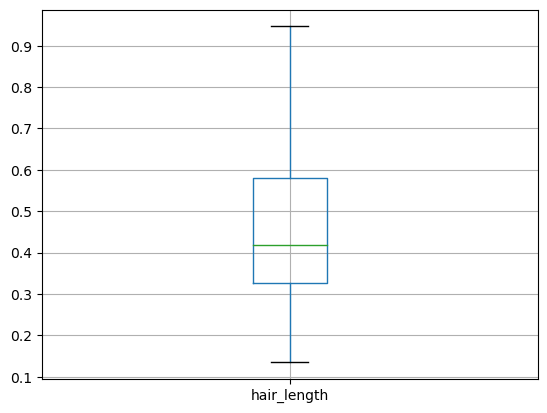

In [371]:
df_cleaned.boxplot('hair_length')

<AxesSubplot:>

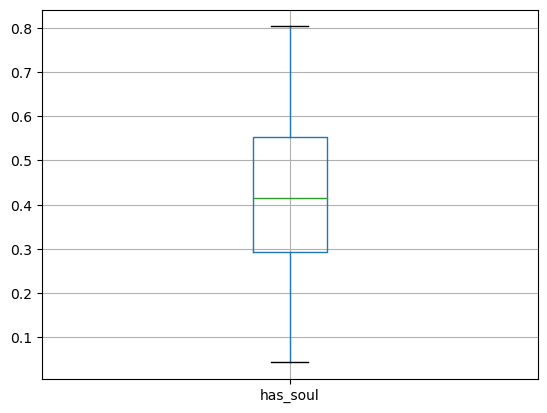

In [372]:
df_cleaned.boxplot('has_soul')